In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dropout

In [9]:
from tensorflow.keras import utils
np.random.seed(10)

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

資料預處理

In [11]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [12]:
x_Train_normalize = x_train_image/255
x_Test_normalize = x_test_image/255

In [13]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [14]:
x_train_image.shape

(50000, 32, 32, 3)

模型建立

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32,(3,3),padding='same',
         input_shape=(32,32,3),
         activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Dropout(0.3))

In [18]:
model.add(Conv2D(32,(3,3),padding='same',
         input_shape=(32,32,3),
         activation='relu'))

In [19]:
model.add(MaxPool2D())

In [20]:
model.add(Conv2D(64,(3,3),padding='same',
         activation='relu'))

In [21]:
model.add(Dropout(0.3))

In [22]:
model.add(Conv2D(64,(3,3),padding='same',
         activation='relu'))

In [23]:
model.add(MaxPool2D())

In [24]:
model.add(Conv2D(128,(3,3),padding='same',
         activation='relu'))

In [25]:

model.add(Dropout(0.3))

In [26]:
model.add(Conv2D(128,(3,3),padding='same',
         activation='relu'))


In [27]:
model.add(MaxPool2D())

In [28]:
model.add(Flatten())

In [29]:
model.add(Dropout(0.3))

In [30]:
model.add(Dense(
    units = 2500,
    kernel_initializer='normal',
    activation='relu'))

In [31]:
model.add(Dropout(0.3))

In [32]:
model.add(Dense(
    units = 1500,
    kernel_initializer='normal',
    activation='relu'))

In [33]:
model.add(Dropout(0.3))

In [34]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [35]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2500)           │     5,122,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     3,751,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,176,018 (35.00 MB)

 Trainable params: 9,176,018 (35.00 MB)

 Non-trainable params: 0 (0.00 B)

None


訓練模型

In [36]:
model.compile(
    loss='categorical_crossentropy',  # 損失函數
    optimizer= Adam(learning_rate = 0.001),                 # 最佳化器
    metrics=['accuracy']             # 評估指標
)

In [37]:

train_history = model.fit(
    x = x_Train_normalize,         # 訓練資料（特徵）→ 已經標準化
    y = y_Train_OneHot,            # 訓練標籤（目標）→ One-hot 編碼
    validation_split = 0.2,        # 20% 訓練資料作為驗證資料（不用額外給 validation set）
    epochs = 50,                   # 訓練 10 輪（整份資料訓練 10 次）
    batch_size = 128,              # 每批次送入 400 筆資料
    verbose = 2,                   # 顯示訓練過程資訊（2 表示精簡模式：每輪顯示一行）
)

Epoch 1/50
313/313 - 416s - 1s/step - accuracy: 0.2926 - loss: 1.8820 - val_accuracy: 0.3992 - val_loss: 1.6292
Epoch 2/50
313/313 - 416s - 1s/step - accuracy: 0.4624 - loss: 1.4561 - val_accuracy: 0.4395 - val_loss: 1.5914
Epoch 3/50
313/313 - 443s - 1s/step - accuracy: 0.5450 - loss: 1.2600 - val_accuracy: 0.5965 - val_loss: 1.1442
Epoch 4/50
313/313 - 440s - 1s/step - accuracy: 0.6025 - loss: 1.1113 - val_accuracy: 0.6212 - val_loss: 1.0554
Epoch 5/50
313/313 - 441s - 1s/step - accuracy: 0.6406 - loss: 1.0061 - val_accuracy: 0.6781 - val_loss: 0.9098
Epoch 6/50
313/313 - 446s - 1s/step - accuracy: 0.6730 - loss: 0.9223 - val_accuracy: 0.6565 - val_loss: 1.0232
Epoch 7/50
313/313 - 438s - 1s/step - accuracy: 0.6979 - loss: 0.8526 - val_accuracy: 0.7191 - val_loss: 0.8128
Epoch 8/50
313/313 - 444s - 1s/step - accuracy: 0.7150 - loss: 0.8007 - val_accuracy: 0.7304 - val_loss: 0.7837
Epoch 9/50
313/313 - 439s - 1s/step - accuracy: 0.7343 - loss: 0.7507 - val_accuracy: 0.7370 - val_loss:

In [38]:
train_history.history

{'accuracy': [0.2926250100135803,
  0.46242499351501465,
  0.544950008392334,
  0.6025000214576721,
  0.6405749917030334,
  0.6729999780654907,
  0.6978750228881836,
  0.7150499820709229,
  0.734250009059906,
  0.7491750121116638,
  0.7605249881744385,
  0.7735249996185303,
  0.7821499705314636,
  0.793524980545044,
  0.8044499754905701,
  0.8094750046730042,
  0.8202250003814697,
  0.8248249888420105,
  0.8322250247001648,
  0.8367249965667725,
  0.8447750210762024,
  0.8497999906539917,
  0.8547000288963318,
  0.8597750067710876,
  0.8651250004768372,
  0.8708750009536743,
  0.8726249933242798,
  0.8748250007629395,
  0.8786749839782715,
  0.8813250064849854,
  0.881974995136261,
  0.8878999948501587,
  0.8896250128746033,
  0.8907750248908997,
  0.8980249762535095,
  0.8989499807357788,
  0.9013500213623047,
  0.9041500091552734,
  0.9029250144958496,
  0.9020749926567078,
  0.9106000065803528,
  0.9071750044822693,
  0.9126250147819519,
  0.9087749719619751,
  0.9135249853134155,
 

In [43]:

import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


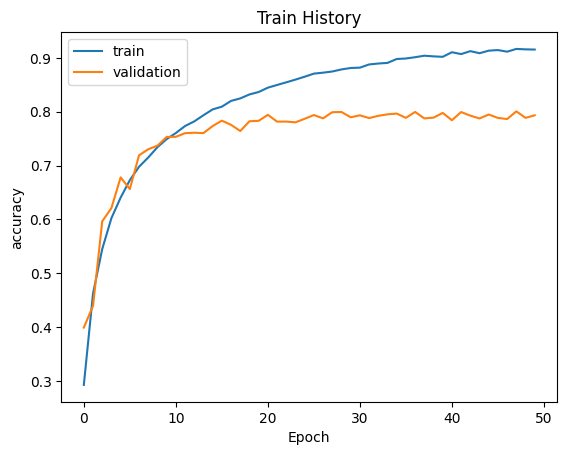

In [44]:

show_train_history(train_history,'accuracy','val_accuracy')

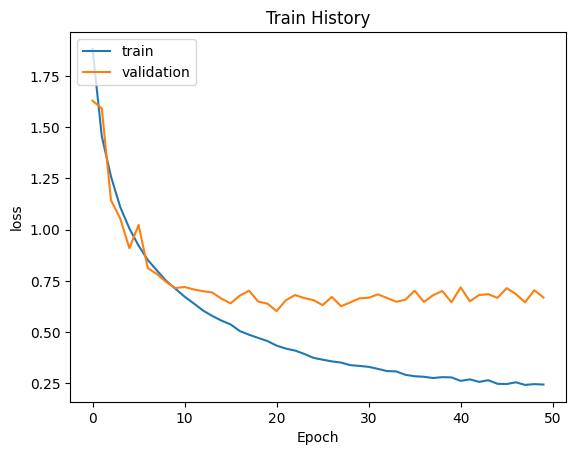

In [45]:
show_train_history(train_history,'loss','val_loss')

評估模型準確率

In [47]:
scores = model.evaluate(x_test_image, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.5591 - loss: 116.1779

accuracy= 0.5644000172615051


進行預測

In [46]:
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [48]:

prediction=model.predict(x_test_image)

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step


In [49]:

predicted_lable = np.argmax(prediction[6])
predicted_lable

np.int64(1)

神經網路預測是： car
實際是： car


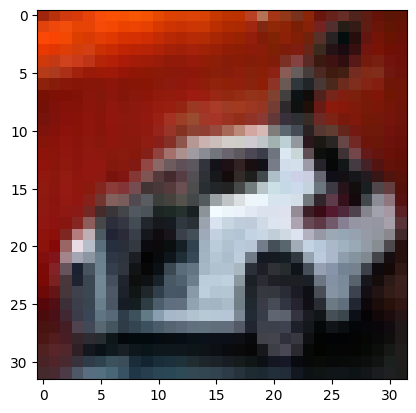

In [50]:
print('神經網路預測是：', class_names[predicted_lable])
print('實際是：', class_names[y_test_label[6].item()])
plt.imshow(x_test_image[6], cmap='Greys');  # 測試圖片需reshape為原來32x32

In [51]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx])
        title = "label=" + str(class_names[labels[idx][0]]) + "\n"
        if prediction is not None:
            title += "predict=" + str(class_names[np.argmax(prediction[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

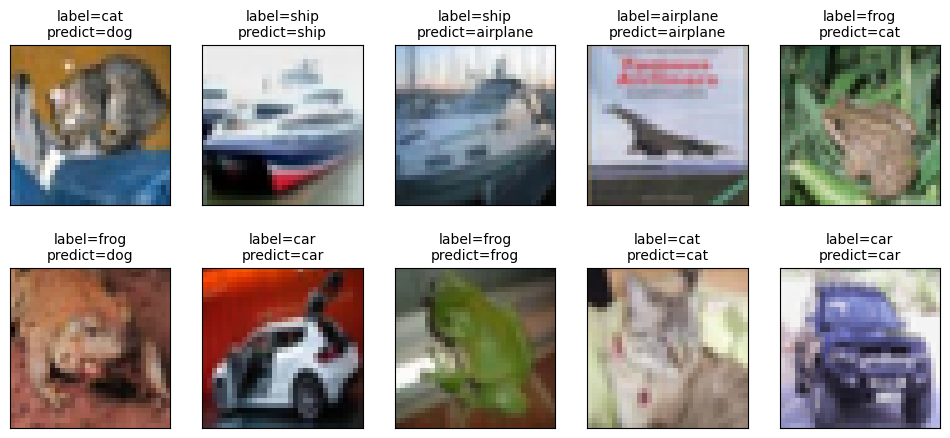

In [52]:

plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

confusion matrix (混淆矩陣)

In [53]:
import pandas as pd
# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label.ravel(), predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,837,43,23,5,0,4,0,7,10,71
1,16,891,0,1,0,4,0,2,11,75
2,251,62,382,36,2,123,15,69,15,45
3,163,56,26,270,5,277,9,100,15,79
4,198,102,50,59,146,93,12,269,5,66
5,63,41,14,63,4,663,6,84,7,55
6,90,192,37,47,4,93,386,55,27,69
7,72,22,6,19,2,52,1,784,5,37
8,330,82,7,6,0,8,0,7,442,118


In [54]:
df = pd.DataFrame({'label': y_test_label.ravel(), 'predict': predicted_labels})
df[:10]

,label,predict
0,3,5
1,8,8
2,8,0
3,0,0
4,6,3
5,6,5
6,1,1
7,6,6
8,3,3
9,1,1


In [55]:
df = pd.DataFrame({'label': y_test_label.ravel(), 'predict': predicted_labels})
df[:10]


,label,predict
0,3,5
1,8,8
2,8,0
3,0,0
4,6,3
5,6,5
6,1,1
7,6,6
8,3,3
9,1,1


In [56]:
df[(df.label==5)&(df.predict==3)]

,label,predict
33,5,3
128,5,3
212,5,3
239,5,3
275,5,3
...,...,...
9446,5,3
9616,5,3
9657,5,3
9774,5,3


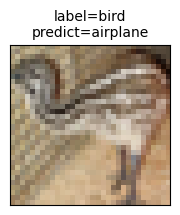

In [57]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

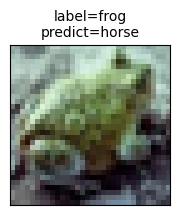

In [58]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)


In [59]:
from google.colab import drive

In [60]:

drive.mount('/content/drive')

Mounted at /content/drive


In [61]:

%cd 'content/drive/My Drive/Colab Notebooks'

[Errno 2] No such file or directory: 'content/drive/My Drive/Colab Notebooks'
/content


In [62]:

model.save('/content/drive/My Drive/hw4-2_model.keras')

In [63]:
!ls "/content/drive/My Drive"

 0508.accdb
'13851_2018 高職物理課後作業2-1直線運動.pdf'
 3B032080_0515.accdb
 3B032080謝東霖
'3B032080謝東霖 (1).accdb'
 3B032080謝東霖.7z
 3B032080謝東霖.accdb
 3B032080謝東霖.docx
 3B032080謝東霖HW1
 3B032080謝東霖HW4.accdb
'Colab Notebooks'
 DIP
 hw3.ipynb
 hw3_model.keras
 hw4-2_model.keras
 IMG_9420.JPG
 IMG_9421.JPG
'Northwind (1)1 (1).accdb'
'Northwind (1)1 (2).accdb'
'Northwind (1)1.accdb'
'Northwind (1)1.accdb最新.accdb'
'Northwind (1).accdb'
 Northwind.ldb
 Northwind.mdb
 pythonclass
 Yeaaahjinmianshan
 使用者檔.xls
 價格檔.xls
 品項內容.xlsx
'專題PPT 影片'
 專題小論文
 庫存檔.xls
'未命名绘图 (1).drawio'
 未命名绘图.drawio
 申請人.xlsx
 申請日期.xlsx
 申請明細.xlsx
 申領檔.xls
 資料庫管理.docx
'電子學附屬教材 - Google 雲端硬碟'
